# Spam Detection using Logistic regression

Spam detection using logistic regression is a classic machine learning problem where the goal is to classify emails, messages, or texts as spam or not spam (ham).

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import re
import string

### Importing Datasets

In [3]:
df=pd.read_csv("spam.csv",encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Feature Engineering 

In [5]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

In [6]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [7]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(f'[{string.punctuation}]', '', text)  # Remove punctuation
    return text

In [8]:
df['message'] = df['message'].apply(preprocess_text)

### Split data into training and testing sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

In [10]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

### Model Selection

In [11]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

### Model Prediction

In [12]:
y_pred = model.predict(X_test_tfidf)

### Model Evaluation

In [13]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [14]:
print(f"Accuracy of {model} is {accuracy*100}")
print(report)

Accuracy of LogisticRegression() is 96.68161434977578
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



### Confusion Matrix

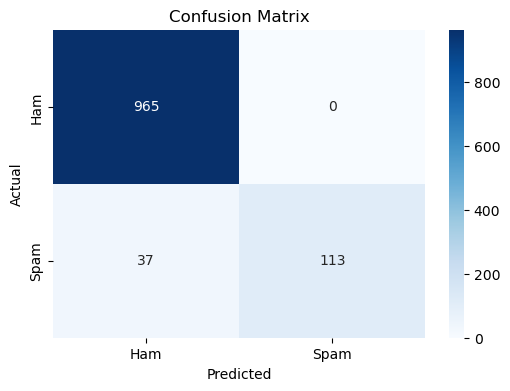

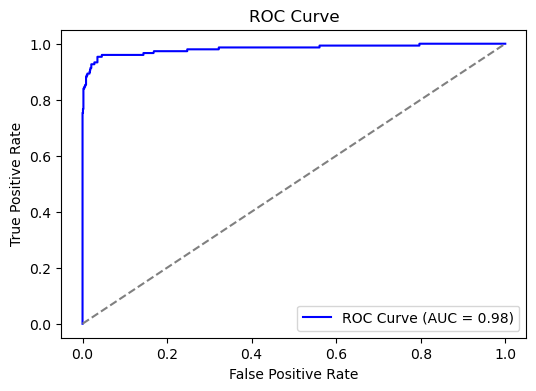

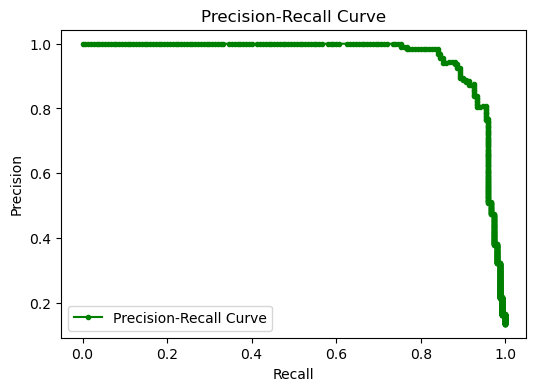

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
y_prob = model.predict_proba(X_test_tfidf)[:, 1]  # Get probability scores
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.', color='green', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
